<a href="https://colab.research.google.com/github/labrador208/Cryostat/blob/main/CryostatGraphingFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random
random.seed(5)

In [ ]:
temp=50

Condensing/streamlining all the code from Cryostat2 so my computer stops crashing it

Adding transmittance filter. Works as multiplier on radiance?

Just the aperture

T=0.8025+0.1004i-0.0005953*i^2+(1.578*1e-6)i^3-(1.86*10^-9)*i^4+(7.428*10^-13)i^5

In [ ]:
i=0.000001
#i=-1
wavelengths=[]
emissivePower=[]
emissivePowerFilter=[]
#emissivePower=[]
Etop=2*(6.63e-34)*((3e8)*(3e8))
#print (Etop)
while i<1:
  #j=i*math.pow(10,6)
  wavelengths.append(i)
  exponentTerm3=(6.63e-34*3.00e8)/((i*1.3805e-23)*temp)
  Ebot=math.pow(i,5)*(np.exp(exponentTerm3)-1)
  E=Etop/Ebot
  #filter=0.8025+(0.1004*i)-(0.005953*(i**2))+(1.5781e-6*(i**3))-(1.86e-9*(i**4))+(7.428e-13*(i**5))
  filter=0.04871+(1.335e4*i)-(8.05e7*(i**2))+(2.138e11*(i**3))-(2.493e14*(i**4))+(1.036e17*(i**5))
  if i>0.001:
    filter=1
  emissivePower.append(E)
  Efilter=E*filter
  emissivePowerFilter.append(Efilter)
  i=i+0.00000005

(0.0, 0.00035)

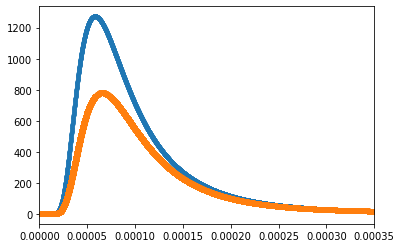

In [ ]:
plt.plot(wavelengths,emissivePower,'.')
plt.plot(wavelengths,emissivePowerFilter,'*')
plt.xlim(0,0.00035)
#plt.xlim(0.00005,1)
#plt.ylim(0,0.2e6)

In [ ]:
xLowerBound=0.0000001
xUpperBound=0.00005
yMax=1e7
count=0.0
countFilter=0.0
x=0.0
Etop=2*(6.63e-34)*((3e8)*(3e8))
xCoordIn=[]
yCoordIn=[]
xCoordFilter=[]
yCoordFilter=[]
xCoordOut=[]
yCoordOut=[]

while x<10000000:
  xCoord=random.uniform(xLowerBound, xUpperBound)
  yCoord=random.uniform(0,yMax)
  exponentTerm3=(6.63*math.pow(10,-34)*3.00*math.pow(10,8))/(xCoord*1.3805*math.pow(10,-23)*temp)
  Ebot=(xCoord**5)*(np.exp(exponentTerm3)-1)
  #filter=0.8025+(0.1004*xCoord)-(0.005953*(xCoord**2))+(1.5781e-6*(xCoord**3))-(1.86e-9*(xCoord**4))+(7.428e-13*(xCoord**5))
  filter=0.04871+(1.335e4*xCoord)-(8.05e7*(xCoord**2))+(2.138e11*(xCoord**3))-(2.493e14*(xCoord**4))+(1.036e17*(xCoord**5))

  if xCoord>0.001:
    filter=1
  functionValue=Etop/Ebot
  functionFilter=functionValue*filter
  x=x+1
  if yCoord<=functionFilter:
    countFilter=countFilter+1
    count=count+1
    #print(xCoord, yCoord, functionValue)

    #print (count)
    #print (x)
    xCoordFilter.append(xCoord)
    yCoordFilter.append(yCoord)
  elif yCoord<=functionValue:
    count=count+1
    xCoordIn.append(xCoord)
    yCoordIn.append(yCoord)
  else:
    xCoordOut.append(xCoord)
    yCoordOut.append(yCoord)
  
ratioFilter=countFilter/x
ratio=count/x
resultFilter=(xUpperBound-xLowerBound)*(yMax)*ratioFilter
print (resultFilter)
result=(xUpperBound-xLowerBound)*(yMax)*ratio
print(result)




33.257252199999996
141.19214979999998


Text(0, 0.5, 'Spectral Radiance (W/m^3)')

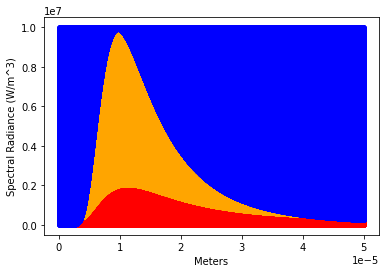

In [ ]:
plt.plot(xCoordIn,yCoordIn,'.',color='orange')
plt.plot(xCoordFilter,yCoordFilter,'.', color='red')
plt.plot(xCoordOut,yCoordOut,'.', color='blue')
#plt.ylim(0, 1.7e-29)
plt.xlabel('Meters')
plt.ylabel('Spectral Radiance (W/m^3)')
#title=' K Integrated from 125GHz to 165GHz'
#title=temp ," K Integrated from 125GHz to 165GHz"
#plt.title(title)
#print(result, "W/m^2")